In [103]:
### Reading and Understanding the Dataset

In [104]:
#import libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
import statsmodels.api as sm

In [105]:
#load dataset
df =pd.read_csv('/content/Mobile phone price.csv')

In [106]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [107]:
# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [108]:
df

,Brand,Model,Storage,RAM,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh),Price_($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [109]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen_Size_(inches)      0
Camera_(MP)               0
Battery_Capacity_(mAh)    0
Price_($)                 0
dtype: int64

In [110]:
df['Brand'].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei'], dtype=object)

In [111]:
df['Brand'].value_counts()

Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: Brand, dtype: int64

In [112]:
model_counts=df['Model'].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'})

In [113]:
model_counts

,Model,Count
0,Poco X3 Pro,6
1,Y33s,5
2,iPhone XR,5
3,C21Y,5
4,Redmi 10 Prime,5
...,...,...
234,Mi 11 Lite NE,1
235,Moto G Stylus 2021,1
236,A54s 5G,1
237,Galaxy M52,1


In [114]:
Brand_counts=df['Brand'].value_counts().reset_index().rename(columns={'index':'Brand','Brand':'count'})

In [115]:
Brand_counts

,Brand,count
0,Samsung,79
1,Xiaomi,67
2,Oppo,56
3,Realme,43
4,Vivo,35
5,Apple,30
6,Nokia,28
7,Motorola,23
8,OnePlus,15
9,Huawei,12


In [116]:
# Cleaning Data

In [117]:
df['Storage']=df['Storage'].str.replace('GB','')

In [118]:
df['Storage']

0      128 
1      256 
2      128 
3      128 
4      128 
       ... 
402     128
403     128
404     128
405     128
406     128
Name: Storage, Length: 407, dtype: object

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen_Size_(inches)    407 non-null    object
 5   Camera_(MP)             407 non-null    object
 6   Battery_Capacity_(mAh)  407 non-null    int64 
 7   Price_($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [120]:
df["Camera_(MP)"]=df["Camera_(MP)"].str.replace("MP","")
df["Camera_(MP)"]=df["Camera_(MP)"].str.replace("D","")

In [121]:
df["Camera_(MP)"]=df["Camera_(MP)"].str.split("+")

In [122]:
listx=[]
for i in df.index:
  listx.append(df["Camera_(MP)"][i][0])

In [123]:
df["Camera_(MP)"]=listx

In [124]:
df["Camera_(MP)"]=df["Camera_(MP)"].astype("float64")

In [125]:
df['RAM']=df['RAM'].str.replace('GB','')

In [126]:
df['RAM'].head()

0     6 
1    12 
2     8 
3     6 
4     8 
Name: RAM, dtype: object

In [127]:
df['Price_($)'].head(20)

0      999
1     1199
2      899
3      279
4      799
5      799
6      999
7      249
8      699
9     1199
10     329
11     449
12     329
13     699
14    1199
15     329
16     799
17     199
18     299
19     379
Name: Price_($), dtype: object

In [128]:
df['Screen_Size_(inches)'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [133]:
df = df[~(df["Screen_Size_(inches)"] == "6.8 + 3.9")]

In [134]:
df = df[~(df["Screen_Size_(inches)"] == "7.6 (unfolded)")]

In [135]:
df["Screen_Size_(inches)"] = df["Screen_Size_(inches)"].astype("float64")

In [136]:
df['Price_($)'] = pd.to_numeric(df['Price_($)'] , errors='coerce')

In [137]:
df['Storage'] = pd.to_numeric(df['Storage'] , errors='coerce')

In [138]:
df['RAM'] = pd.to_numeric(df['RAM'] , errors='coerce')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   405 non-null    object 
 1   Model                   405 non-null    object 
 2   Storage                 405 non-null    int64  
 3   RAM                     405 non-null    int64  
 4   Screen_Size_(inches)    405 non-null    float64
 5   Camera_(MP)             405 non-null    float64
 6   Battery_Capacity_(mAh)  405 non-null    int64  
 7   Price_($)               196 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 28.5+ KB


In [140]:
df.describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
Storage,405.000000,122.390123,64.445048,32.000000,64.000000,128.000000,128.000000,512.000000
RAM,405.000000,5.817284,2.416158,2.000000,4.000000,6.000000,8.000000,16.000000
Screen_Size_(inches),405.000000,6.467654,0.315946,4.500000,6.440000,6.500000,6.580000,6.900000
Camera_(MP),405.000000,43.345679,24.659403,8.000000,13.000000,48.000000,64.000000,108.000000
Battery_Capacity_(mAh),405.000000,4678.582716,798.404462,1821.000000,4300.000000,5000.000000,5000.000000,7000.000000
Price_($),196.000000,499.362245,323.608938,99.000000,239.000000,399.000000,699.000000,1399.000000


In [141]:
df.describe(include="O").T

,count,unique,top,freq
Brand,405,16,Samsung,78
Model,405,237,Poco X3 Pro,6


In [142]:
df.drop_duplicates(inplace=True)

In [143]:
df.duplicated().any()

False

In [144]:
df.shape

(347, 8)

In [145]:
Mean_Price = df['Price_($)'].mean()

In [146]:
df['Price_($)']=df['Price_($)'].fillna(Mean_Price)

In [147]:
df['Price_($)'].isnull().sum()

0

In [ ]:
#visualiztion

<ipython-input-148-f58e39b62a3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.5)


<Axes: >

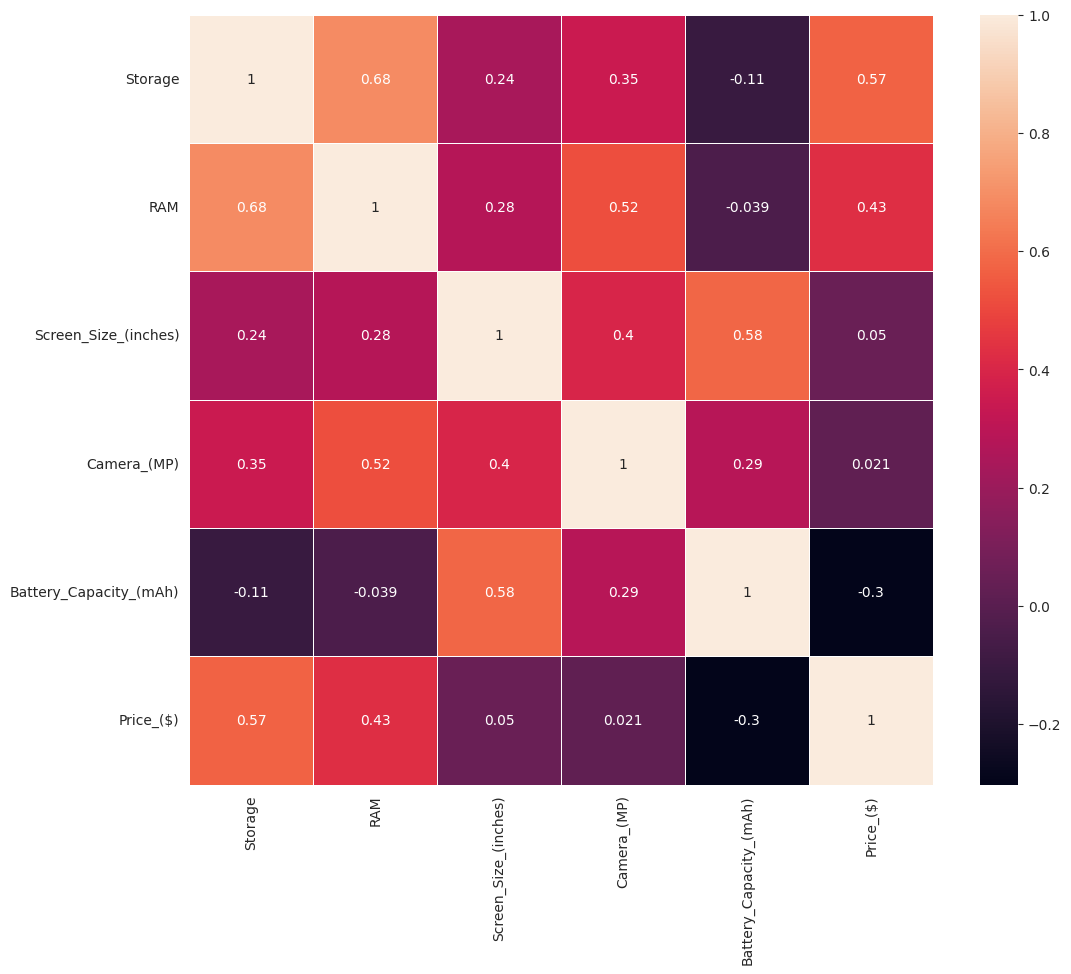

In [148]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

<Axes: xlabel='Battery_Capacity_(mAh)', ylabel='Brand'>

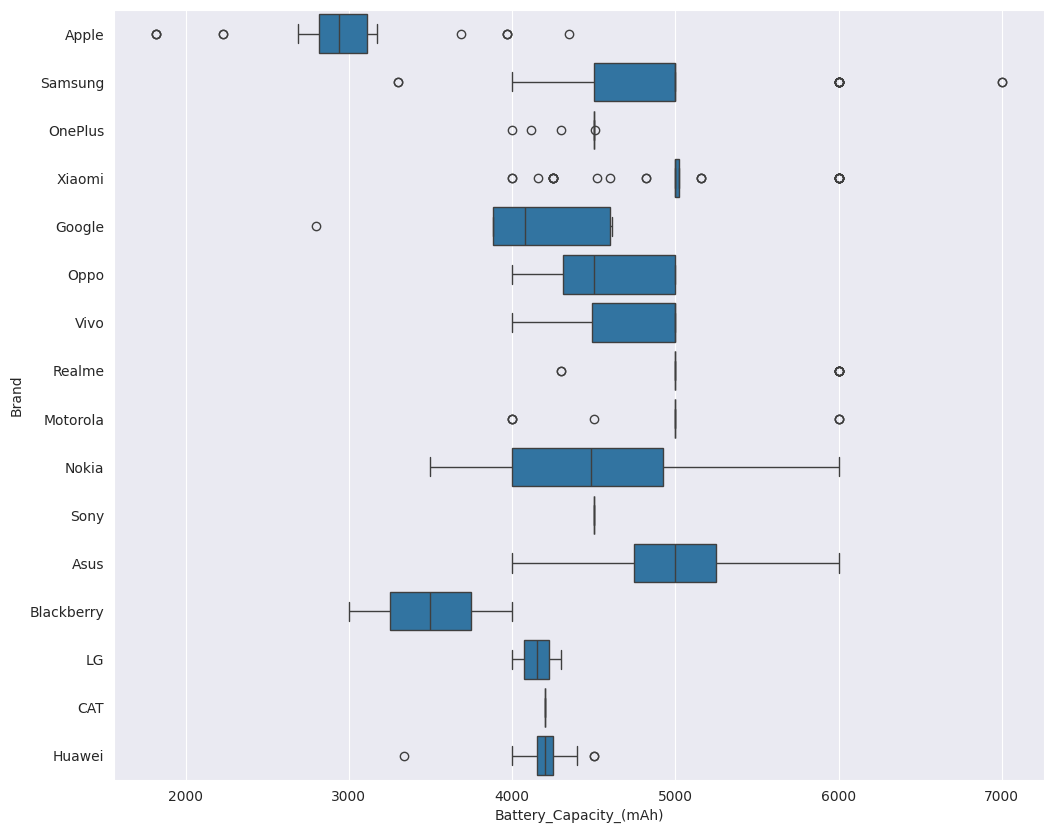

In [149]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Battery_Capacity_(mAh)",y="Brand",data=df)

Text(0.5, 1.0, '[Price vs Brand]by Screen Size')

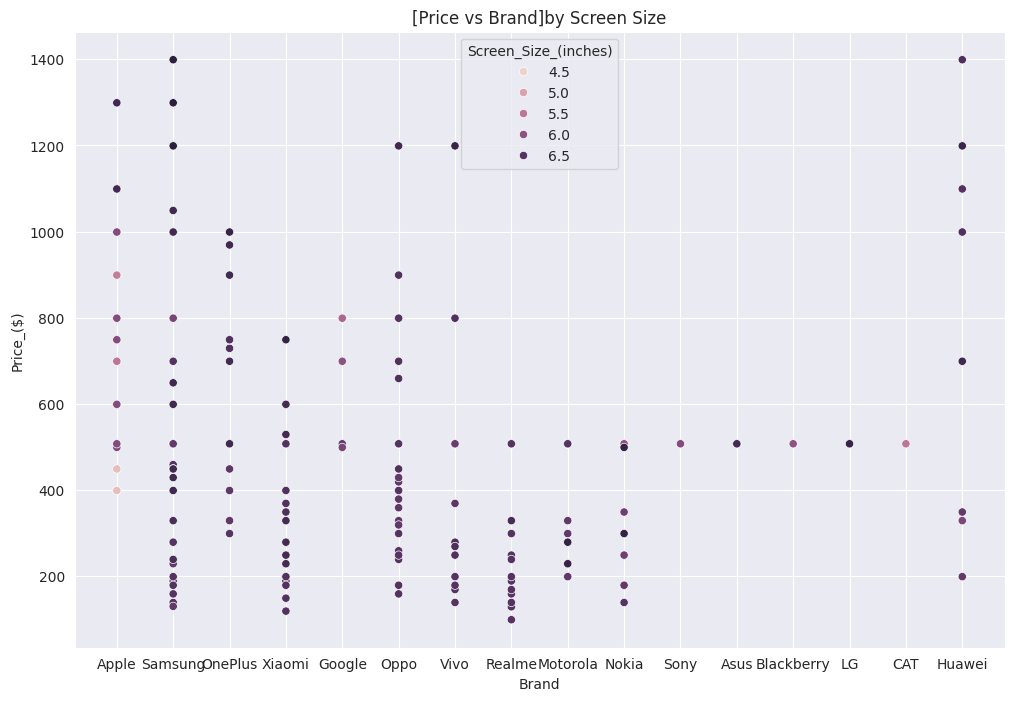

In [150]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df,x="Brand",y="Price_($)",hue="Screen_Size_(inches)")
plt.title("[Price vs Brand]by Screen Size")

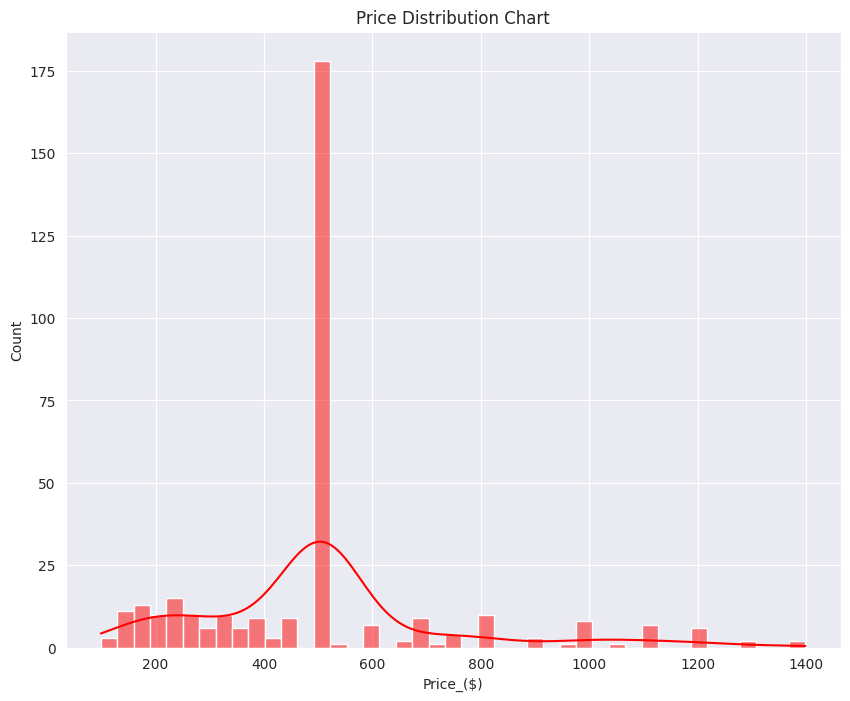

In [151]:
plt.figure(figsize=(10,8))
sns.histplot(data=df['Price_($)'],kde=True,color="Red")
plt.title('Price Distribution Chart')
plt.show()

In [ ]:
# Encoding

In [152]:
df.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen_Size_(inches)',
       'Camera_(MP)', 'Battery_Capacity_(mAh)', 'Price_($)'],
      dtype='object')

In [153]:
le=LabelEncoder()

In [154]:
Brand=LabelEncoder()
Model=LabelEncoder()

In [155]:
df['Brand'].value_counts()

Samsung       67
Xiaomi        55
Oppo          51
Realme        37
Vivo          28
Apple         25
Nokia         22
Motorola      21
OnePlus       13
Huawei        12
Google         5
Asus           4
Blackberry     3
LG             2
Sony           1
CAT            1
Name: Brand, dtype: int64

In [156]:
df['Brand']=Brand.fit_transform(df['Brand'])

In [157]:
df['Brand'].value_counts()

12    67
15    55
10    51
11    37
14    28
0     25
8     22
7     21
9     13
5     12
4      5
1      4
2      3
6      2
13     1
3      1
Name: Brand, dtype: int64

In [158]:
Brand.classes_

array(['Apple', 'Asus', 'Blackberry', 'CAT', 'Google', 'Huawei', 'LG',
       'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Samsung',
       'Sony', 'Vivo', 'Xiaomi'], dtype=object)

In [159]:
df['Model'].value_counts()

A54                  5
iPhone 11            4
Redmi Note 10 Pro    4
Narzo 50A            4
A53s                 3
                    ..
Edge 20 Fusion       1
C21                  1
Galaxy S21 Ultra     1
Moto G Power 2021    1
Reno3                1
Name: Model, Length: 237, dtype: int64

In [160]:
df['Model']=Model.fit_transform(df['Model'])

In [161]:
df['Model'].value_counts()

30     5
222    4
177    4
144    4
28     3
      ..
49     1
44     1
100    1
124    1
187    1
Name: Model, Length: 237, dtype: int64

In [ ]:
# Split Data

In [162]:
x =df.drop('Price_($)',axis=1)
y = df['Price_($)']

In [163]:
from re import X
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
df.shape

(347, 8)

In [165]:
X_train.shape

(277, 7)

In [166]:
X_train

,Brand,Model,Storage,RAM,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh)
189,12,91,128,6,6.70,64.0,5000
81,15,166,128,6,6.67,48.0,5160
94,10,53,128,8,6.43,48.0,4310
16,12,99,128,8,6.20,64.0,4000
69,14,212,128,4,6.51,50.0,5000
...,...,...,...,...,...,...,...
208,12,93,128,8,6.70,64.0,7000
74,0,222,128,4,6.10,12.0,3110
110,15,163,128,6,6.50,48.0,5000
310,15,177,128,6,6.67,108.0,5020


In [167]:
y_train

189    507.436047
81     507.436047
94     507.436047
16     799.000000
69     179.000000
          ...    
208    507.436047
74     599.000000
110    507.436047
310    279.000000
106    507.436047
Name: Price_($), Length: 277, dtype: float64

In [168]:
x_test.shape

(70, 7)

In [169]:
x_test

,Brand,Model,Storage,RAM,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh)
374,15,113,128,8,6.67,108.0,5000
118,7,132,64,4,6.50,48.0,5000
378,8,1,32,2,6.50,13.0,4500
307,8,61,128,4,6.82,48.0,4850
350,5,151,128,8,6.40,48.0,4200
...,...,...,...,...,...,...,...
97,8,5,64,4,6.39,48.0,4000
193,15,171,128,6,6.53,50.0,5000
198,7,138,64,4,6.50,48.0,6000
220,10,27,128,6,6.50,13.0,5000


In [ ]:
# Data Scaling using Robust Scaler

In [171]:
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
X_train_numeric.fillna(X_train_numeric.median(), inplace=True)


In [172]:
ro_scaler = RobustScaler()
x_train_transformed = ro_scaler.fit_transform(X_train_numeric)


In [173]:
ro_scaler=RobustScaler()
x_train=ro_scaler.fit_transform(X_train)
x_test =ro_scaler.fit_transform(x_test)

In [174]:
x_train.shape

(277, 7)

In [ ]:
# Linear Regression

In [175]:
lin=LinearRegression()

In [176]:
lin.fit(X_train,y_train)

LinearRegression()

In [177]:
lin.score(X_train,y_train)

0.4325309409073106

In [179]:
lin.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-12.455115502576371

In [180]:
lin.coef_

array([-1.85199246e+01,  1.16383614e-01,  9.95247369e-01,  2.75199593e+01,
        1.46455451e+02, -1.06446713e+00, -3.56086975e-02])

In [181]:
lin.intercept_

-336.725061760057

In [182]:
pd.DataFrame(lin.coef_ , df.columns[:-1] , columns = ["coeficient"])

,coeficient
Brand,-18.519925
Model,0.116384
Storage,0.995247
RAM,27.519959
Screen_Size_(inches),146.455451
Camera_(MP),-1.064467
Battery_Capacity_(mAh),-0.035609


In [184]:
y_pred=lin.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-198.07830017, -404.52915062, -452.72085154,  -76.30596505,
       -390.50808314, -146.21394111, -416.8025402 , -329.83497142,
       -281.39059783, -398.90357401, -580.80271968, -440.68119903,
       -161.02131506, -800.75357001, -341.48659225, -722.68448265,
       -189.97112511, -387.33794118,   -8.89033805, -353.74788821,
       -268.83408877, -386.30555633, -204.36373092, -497.71285831,
          7.67342595, -715.82345442,   75.28076902,   53.42245293,
       -406.91499399,  142.27035509,  -72.69653602, -407.81671841,
       -339.9470481 , -349.80386334, -336.09726222, -341.50093135,
       -504.4109411 , -176.16924871, -549.21343204, -277.99175659,
       -417.9086103 , -666.55745137,  -60.00704326, -652.10830854,
       -986.0532965 , -151.97254248, -268.87759931, -340.06630266,
       -417.44371982,  -90.14087648, -487.5474286 , -210.86427077,
       -343.59495108, -652.12762282, -652.11272538, -253.87643176,
       -353.82274886, -326.64115683, -130.63875721, -352.89376

In [185]:
df2 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})

In [186]:
df2.head(10)

,Y_test,Y_predict
374,599.000000,-198.078300
118,507.436047,-404.529151
378,139.000000,-452.720852
307,299.000000,-76.305965
350,329.000000,-390.508083
128,507.436047,-146.213941
228,507.436047,-416.802540
258,507.436047,-329.834971
294,449.000000,-281.390598
161,507.436047,-398.903574


In [187]:
reg_score=r2_score(y_test,y_pred)
reg_score

-12.455115502576371

In [188]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(reg_score)*(n-1)/(n-p-1)
adj_R2

13.779226314911073

In [189]:
mape = mean_absolute_percentage_error(y_test , y_pred)
mape

1.8537526309731422

In [190]:
mae = mean_absolute_error(y_test , y_pred)
mae

871.9965875972733